In [1]:
import pandas as pd
import numpy as np

import pylab as plt
import seaborn as sns

import matplotlib

In [2]:
def convtime(x):
    x=x.removesuffix(':00+00:00')
    x=x.replace('T',' ')
    return x

In [3]:
signals=pd.read_csv('../1-input/5-signals-training.csv', sep=';')
print(signals.shape)
signals1=pd.read_csv('../1-input/5-signals-testing.csv', sep=';')
print(signals1.shape)
signals=signals.append(signals1)
print(signals.shape)
signals['Timestamp']=signals['Timestamp'].apply(convtime)
signals['Timestamp'] = pd.to_datetime(signals['Timestamp'])
signals['working']=signals.Grd_Prod_Pwr_Avg.apply(lambda x: 1 if x>50 else 0)
signals.loc[signals.working==1].shape, signals.shape
signals.reset_index(drop=True, inplace=True)
signals.head()


(434145, 83)
(87639, 83)


C:\Users\David MC\AppData\Local\Temp\ipykernel_3856\3030828519.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  signals=signals.append(signals1)


(521784, 83)


Turbine_ID  Timestamp  Gen_RPM_Max  Gen_RPM_Min  Gen_RPM_Avg  Gen_RPM_Std  \
0        T11 2016-01-01       1339.4       1233.3       1270.9         18.8   
1        T06 2016-01-01       1270.0       1232.8       1248.5          6.8   
2        T01 2016-01-01       1277.4       1226.1       1249.0          9.0   
3        T09 2016-01-01       1376.7       1234.3       1272.0         24.7   
4        T07 2016-01-01       1317.5       1229.5       1254.9         13.8   

   Gen_Bear_Temp_Avg  Gen_Phase1_Temp_Avg  Gen_Phase2_Temp_Avg  \
0               42.0                   59                   61   
1               42.0                   51                   52   
2               41.0                   58                   59   
3               40.0                   58                   57   
4               41.0                   62                   62   

   Gen_Phase3_Temp_Avg  ...  Grd_Prod_PsbleInd_Max  Grd_Prod_PsbleInd_Min  \
0                   60  ...                 -752.6                -1000.0   
1                   53  ...                    0.0                 -880.6   
2                   58  ...                    0.0                 -584.5   
3                   58  ...                 -224.5                -1000.0   
4                   61  ...                    0.0                -1000.0   

   Grd_Prod_PsbleInd_Std  Grd_Prod_PsbleCap_Avg  Grd_Prod_PsbleCap_Max  \
0                   56.5                  973.4                 1000.0   
1                  180.0                  307.1                  880.6   
2                  157.1                  144.4                  584.5   
3                  185.5                  861.6                 1000.0   
4                  338.9                  536.5                 1000.0   

   Grd_Prod_PsbleCap_Min  Grd_Prod_PsbleCap_Std  Gen_Bear2_Temp_Avg  \
0                  752.6                   56.5                  38   
1                    0.0                  180.0                  35   
2                    0.0                  157.1                  37   
3                  224.5                  185.5                  33   
4                    0.0                  338.9                  39   

   Nac_Direction_Avg  working  
0              206.9        1  
1              204.6        1  
2              218.5        0  
3              214.0        1  
4              197.3        1  

[5 rows x 84 columns]

In [4]:
fails=pd.read_csv('../1-input/3-failures.csv', sep=';')
fails['Timestamp']=fails['Timestamp'].apply(convtime)
fails['Timestamp'] = pd.to_datetime(fails['Timestamp'])
fgen=fails.loc[fails.Component=='GEARBOX']

fgen

Turbine_ID Component           Timestamp                   Remarks
0         T01   GEARBOX 2016-07-18 02:10:00      Gearbox pump damaged
10        T09   GEARBOX 2016-10-11 08:06:00          Gearbox repaired
17        T06   GEARBOX 2017-10-17 08:38:00  Gearbox bearings damaged
23        T09   GEARBOX 2017-10-18 08:32:00             Gearbox noise

In [5]:
signals=signals.loc[signals.working==1]
signals.reset_index(drop=True, inplace=True)
fgen.reset_index(drop=True, inplace=True)

In [6]:
delta=  fgen.Timestamp[0]-signals.Timestamp[110000]

sep2=[3]
sep=str(delta).split(' days')
sep[0]=float(sep[0])
sep[1]=sep[1].removeprefix(' +').removesuffix(':00').split(':')
sep2[0]=sep[0]
sep2.append(int(sep[1][0]))
sep2.append(int(sep[1][1]))
sep=sep2
if sep[0]<60 and sep[0]>=0:
    print(1)
    calc=sep[0]*(1*24*6)+sep[1]*6+sep[2]/10
    print(calc)

delta, signals.Timestamp[110000], fgen.Timestamp[0]

(Timedelta('-50 days +16:50:00'),
 Timestamp('2016-09-05 09:20:00'),
 Timestamp('2016-07-18 02:10:00'))

In [7]:
signals['fase60']=0
signals['vid_util']=60*24*6


for j, moment in enumerate(signals.Timestamp):
    for i, event in enumerate(fgen.Timestamp):
        delta=  event-moment
        sep2=[3]
        sep=str(delta).split(' days')
        sep[0]=float(sep[0])
        sep[1]=sep[1].removeprefix(' +').removesuffix(':00').split(':')
        sep2[0]=sep[0]
        sep2.append(int(sep[1][0]))
        sep2.append(int(sep[1][1]))
        sep=sep2
        if sep[0]<60 and sep[0]>0 and fgen.Turbine_ID[i]==signals.Turbine_ID[j]:
            signals['fase60'][j]=1
            calc=sep[0]*(24*6)+sep[1]*6+sep[2]/10
            signals['vid_util'][j]=calc
        else: 
            continue
            
            


C:\Users\David MC\AppData\Local\Temp\ipykernel_3856\4077355795.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  signals['fase60'][j]=1
C:\Users\David MC\AppData\Local\Temp\ipykernel_3856\4077355795.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  signals['vid_util'][j]=calc


In [8]:
signals.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 334467 entries, 0 to 334466
Data columns (total 86 columns):
 #   Column                       Non-Null Count   Dtype         
---  ------                       --------------   -----         
 0   Turbine_ID                   334467 non-null  object        
 1   Timestamp                    334467 non-null  datetime64[ns]
 2   Gen_RPM_Max                  334467 non-null  float64       
 3   Gen_RPM_Min                  334467 non-null  float64       
 4   Gen_RPM_Avg                  334467 non-null  float64       
 5   Gen_RPM_Std                  334467 non-null  float64       
 6   Gen_Bear_Temp_Avg            334462 non-null  float64       
 7   Gen_Phase1_Temp_Avg          334467 non-null  int64         
 8   Gen_Phase2_Temp_Avg          334467 non-null  int64         
 9   Gen_Phase3_Temp_Avg          334467 non-null  int64         
 10  Hyd_Oil_Temp_Avg             334467 non-null  int64         
 11  Gear_Oil_Temp_Avg         

In [9]:
signals.loc[signals['fase60']==1]

Turbine_ID           Timestamp  Gen_RPM_Max  Gen_RPM_Min  Gen_RPM_Avg  \
60222         T01 2016-05-19 13:20:00       1307.3       1230.6       1256.3   
60227         T01 2016-05-19 13:30:00       1278.2       1229.7       1251.8   
60231         T01 2016-05-19 13:40:00       1354.6       1227.3       1265.8   
60237         T01 2016-05-19 13:50:00       1441.6       1248.0       1314.9   
60241         T01 2016-05-19 14:00:00       1555.1       1245.0       1363.8   
...           ...                 ...          ...          ...          ...   
299450        T09 2017-10-17 07:50:00       1725.9       1455.1       1670.0   
299454        T09 2017-10-17 08:00:00       1736.8       1446.5       1665.6   
299459        T09 2017-10-17 08:10:00       1744.3       1516.7       1674.5   
299466        T09 2017-10-17 08:20:00       1743.9       1636.1       1678.6   
299470        T09 2017-10-17 08:30:00       1752.3       1571.3       1674.3   

        Gen_RPM_Std  Gen_Bear_Temp_Avg  Gen_Phase1_Temp_Avg  \
60222          14.5               42.0                   36   
60227           9.3               47.0                   41   
60231          23.8               50.0                   45   
60237          48.6               52.0                   50   
60241          75.2               53.0                   53   
...             ...                ...                  ...   
299450         33.2               66.0                  111   
299454         47.6               65.0                  113   
299459         29.3               65.0                  114   
299466         17.3               65.0                  115   
299470         27.6               65.0                  116   

        Gen_Phase2_Temp_Avg  Gen_Phase3_Temp_Avg  ...  Grd_Prod_PsbleInd_Std  \
60222                    36                   36  ...                  263.4   
60227                    41                   40  ...                  248.0   
60231                    45                   45  ...                  206.8   
60237                    49                   49  ...                    3.9   
60241                    53                   52  ...                    0.0   
...                     ...                  ...  ...                    ...   
299450                  105                  107  ...                  112.3   
299454                  106                  108  ...                  176.2   
299459                  108                  110  ...                  188.4   
299466                  108                  111  ...                  174.6   
299470                  109                  112  ...                  192.8   

        Grd_Prod_PsbleCap_Avg  Grd_Prod_PsbleCap_Max  Grd_Prod_PsbleCap_Min  \
60222                   533.0                 1000.0                   58.7   
60227                   484.0                 1000.0                    0.0   
60231                   831.0                 1000.0                  200.7   
60237                   999.5                 1000.0                  954.8   
60241                  1000.0                 1000.0                 1000.0   
...                       ...                    ...                    ...   
299450                  849.3                 1000.0                  406.1   
299454                  695.3                 1000.0                  406.1   
299459                  618.3                 1000.0                  406.1   
299466                  720.7                 1000.0                  406.1   
299470                  610.3                 1000.0                  406.1   

        Grd_Prod_PsbleCap_Std  Gen_Bear2_Temp_Avg  Nac_Direction_Avg  working  \
60222                   263.4                  30              267.9        1   
60227                   248.0                  32              261.6        1   
60231                   206.8                  34              261.6        1   
60237                     3.9                  36      

In [10]:
listc=signals.columns
listc

Index(['Turbine_ID', 'Timestamp', 'Gen_RPM_Max', 'Gen_RPM_Min', 'Gen_RPM_Avg',
       'Gen_RPM_Std', 'Gen_Bear_Temp_Avg', 'Gen_Phase1_Temp_Avg',
       'Gen_Phase2_Temp_Avg', 'Gen_Phase3_Temp_Avg', 'Hyd_Oil_Temp_Avg',
       'Gear_Oil_Temp_Avg', 'Gear_Bear_Temp_Avg', 'Nac_Temp_Avg',
       'Rtr_RPM_Max', 'Rtr_RPM_Min', 'Rtr_RPM_Avg', 'Amb_WindSpeed_Max',
       'Amb_WindSpeed_Min', 'Amb_WindSpeed_Avg', 'Amb_WindSpeed_Std',
       'Amb_WindDir_Relative_Avg', 'Amb_WindDir_Abs_Avg', 'Amb_Temp_Avg',
       'Prod_LatestAvg_ActPwrGen0', 'Prod_LatestAvg_ActPwrGen1',
       'Prod_LatestAvg_ActPwrGen2', 'Prod_LatestAvg_TotActPwr',
       'Prod_LatestAvg_ReactPwrGen0', 'Prod_LatestAvg_ReactPwrGen1',
       'Prod_LatestAvg_ReactPwrGen2', 'Prod_LatestAvg_TotReactPwr',
       'HVTrafo_Phase1_Temp_Avg', 'HVTrafo_Phase2_Temp_Avg',
       'HVTrafo_Phase3_Temp_Avg', 'Grd_InverterPhase1_Temp_Avg',
       'Cont_Top_Temp_Avg', 'Cont_Hub_Temp_Avg', 'Cont_VCP_Temp_Avg',
       'Gen_SlipRing_Temp_Avg', 'Spin

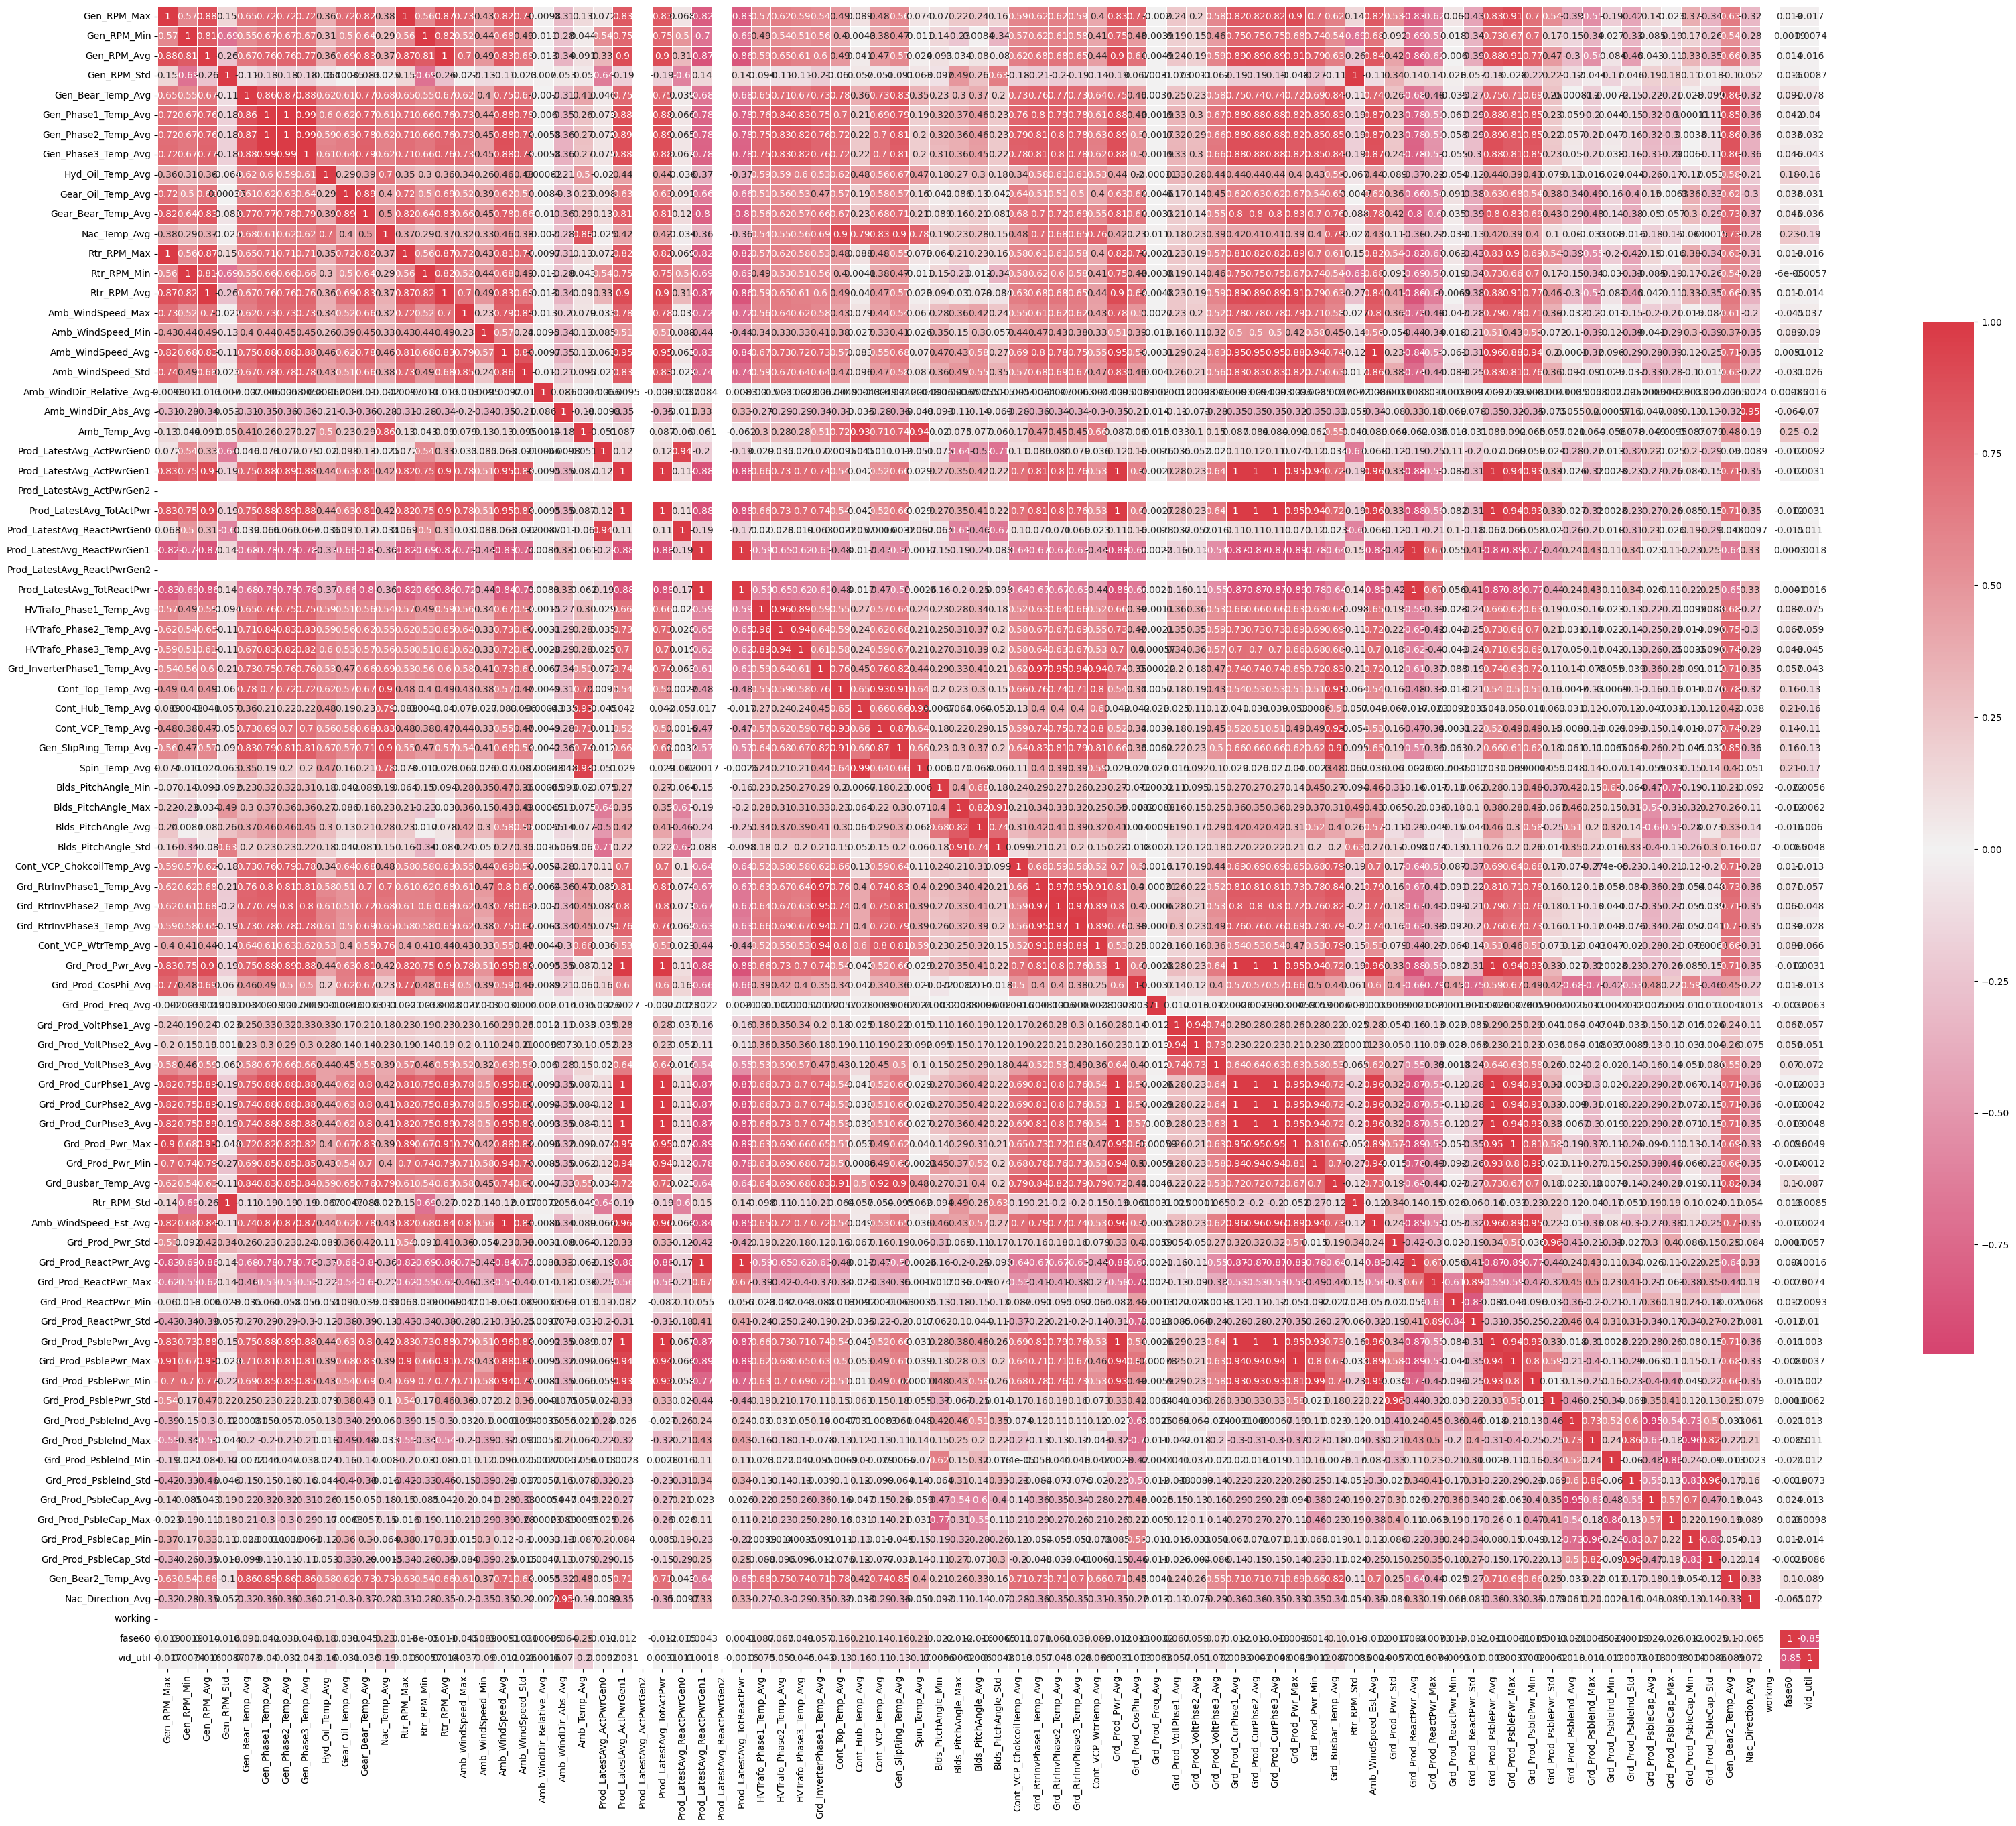

In [11]:
plt.figure(figsize=(40, 40))

mask=np.triu(np.ones_like(signals.corr(), dtype=bool))

cmap=sns.diverging_palette(0, 10, as_cmap=True)

sns.heatmap(signals.corr(),
           #mask=mask,
          cmap=cmap,
          center=0,
          square=True,
          annot=True,
          linewidths=0.5,
          cbar_kws={'shrink': 0.5});

In [12]:
cor_matrix = signals.corr().abs()
upper_tri = cor_matrix.where(np.triu(np.ones(cor_matrix.shape),k=1).astype(np.bool))
to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > 0.95)]
to_drop2=['working', 'Prod_LatestAvg_ActPwrGen2','Prod_LatestAvg_ReactPwrGen2']
to_drop+=to_drop2

C:\Users\David MC\AppData\Local\Temp\ipykernel_3856\234955373.py:2: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  upper_tri = cor_matrix.where(np.triu(np.ones(cor_matrix.shape),k=1).astype(np.bool))


In [13]:
signals.drop(to_drop, axis=1, inplace=True)
signals

Turbine_ID           Timestamp  Gen_RPM_Max  Gen_RPM_Min  Gen_RPM_Avg  \
0             T11 2016-01-01 00:00:00       1339.4       1233.3       1270.9   
1             T06 2016-01-01 00:00:00       1270.0       1232.8       1248.5   
2             T09 2016-01-01 00:00:00       1376.7       1234.3       1272.0   
3             T07 2016-01-01 00:00:00       1317.5       1229.5       1254.9   
4             T09 2016-01-01 00:10:00       1485.0       1239.7       1321.4   
...           ...                 ...          ...          ...          ...   
334462        T11 2017-12-31 23:50:00       1320.5       1216.8       1262.0   
334463        T07 2017-12-31 23:50:00       1329.9       1193.0       1257.6   
334464        T01 2017-12-31 23:50:00       1273.1       1239.8       1250.7   
334465        T09 2017-12-31 23:50:00       1258.3       1239.7       1249.5   
334466        T06 2017-12-31 23:50:00       1270.8       1229.6       1249.4   

        Gen_RPM_Std  Gen_Bear_Temp_Avg  Gen_Phase1_Temp_Avg  Hyd_Oil_Temp_Avg  \
0              18.8               42.0                   59                30   
1               6.8               42.0                   51                30   
2              24.7               40.0                   58                44   
3              13.8               41.0                   62                32   
4              50.4               40.0                   58                44   
...             ...                ...                  ...               ...   
334462         20.6               42.0                   56                28   
334463         18.9               38.0                   61                30   
334464          4.7               39.0                   59                26   
334465          3.1               39.0                   60                45   
334466          6.6               42.0                   56                28   

        Gear_Oil_Temp_Avg  ...  Grd_Prod_PsbleInd_Avg  Grd_Prod_PsbleInd_Max  \
0                      48  ...                 -973.4                 -752.6   
1                      43  ...                 -307.1                    0.0   
2                      43  ...                 -861.6                 -224.5   
3                      45  ...                 -536.5                    0.0   
4                      43  ...                 -871.4                 -293.3   
...                   ...  ...                    ...                    ...   
334462                 50  ...                -1000.0                -1000.0   
334463                 49  ...                 -966.0                 -256.3   
334464                 49  ...                 -983.9                 -727.0   
334465                 46  ...                 -955.8                 -372.9   
334466                 49  ...                 -793.6                  -99.8   

        Grd_Prod_PsbleInd_Min  Grd_Prod_PsbleInd_Std  Grd_Prod_PsbleCap_Avg  \
0                     -1000.0                   56.5                  973.4   
1                      -880.6                  180.0                  307.1   
2                     -1000.0                  185.5                  861.6   
3                     -1000.0                  338.9                  536.5   
4                     -1000.0                  227.4                  871.4   
...                       ...                    ...                    ...   
334462                -1000.0                    0.0                 1000.0   
334463                -1000.0                  109.8                  966.0   
334464                -1000.0                   50.2                  983.9   
334465                -1000.0                  119.2                  955.8   
334466                -1000.0                  259.5                  793.6   

        Grd_Prod_PsbleCap_Max  Gen_Bear2_Temp_Avg  Nac_Direction_Avg  fase60  \
0                      1000.0                  38              206.9       0   
1  

In [14]:
def turbine_name(x):
    equis=int(x.removeprefix('T'))       
    return equis

In [15]:
signals.Turbine_ID=signals.Turbine_ID.apply(lambda x: turbine_name(x))
signals=signals.dropna().reset_index(drop=True)

In [16]:
import random

list_ceros= signals.loc[(signals.fase60==0)].index
list_unos= signals.loc[(signals.fase60==1)].index
list_ceros_equal=random.choices(list(list_ceros), k=len(list_unos)*4)
list_analysis= list_ceros_equal + list(list_unos)
list_analysis.sort()
signals2=signals.iloc[list_analysis]
len(list_ceros_equal), len(list_ceros), len(list_unos), len(list_analysis)

(89704, 312036, 22426, 112130)

In [17]:
signals.iloc[list_unos].fase60

60222     1
60227     1
60231     1
60237     1
60241     1
         ..
299445    1
299449    1
299454    1
299461    1
299465    1
Name: fase60, Length: 22426, dtype: int64

In [18]:
signals2.head(10)

Turbine_ID           Timestamp  Gen_RPM_Max  Gen_RPM_Min  Gen_RPM_Avg  \
1            6 2016-01-01 00:00:00       1270.0       1232.8       1248.5   
4            9 2016-01-01 00:10:00       1485.0       1239.7       1321.4   
5            7 2016-01-01 00:10:00       1271.1       1233.4       1251.9   
8            9 2016-01-01 00:20:00       1441.0       1274.6       1363.4   
12           7 2016-01-01 00:30:00       1408.5       1227.0       1259.9   
24           9 2016-01-01 00:50:00       1568.6       1261.9       1451.6   
27           1 2016-01-01 01:00:00       1350.0       1228.0       1265.5   
29           7 2016-01-01 01:00:00       1318.7       1236.1       1263.8   
31           6 2016-01-01 01:10:00       1271.1       1226.9       1250.3   
32          11 2016-01-01 01:10:00       1293.3       1235.6       1257.1   

    Gen_RPM_Std  Gen_Bear_Temp_Avg  Gen_Phase1_Temp_Avg  Hyd_Oil_Temp_Avg  \
1           6.8               42.0                   51                30   
4          50.4               40.0                   58                44   
5           7.1               42.0                   62                32   
8          31.0               40.0                   58                44   
12         25.4               42.0                   63                32   
24         65.9               42.0                   60                44   
27         22.5               40.0                   59                30   
29         17.0               43.0                   64                32   
31          7.7               42.0                   50                31   
32         10.9               44.0                   61                30   

    Gear_Oil_Temp_Avg  ...  Grd_Prod_PsbleInd_Avg  Grd_Prod_PsbleInd_Max  \
1                  43  ...                 -307.1                    0.0   
4                  43  ...                 -871.4                 -293.3   
5                  45  ...                 -469.6                    0.0   
8                  44  ...                 -999.7                 -904.9   
12                 45  ...                 -592.2                 -147.7   
24                 46  ...                 -999.8                 -937.4   
27                 45  ...                 -772.6                  -66.3   
29                 47  ...                 -917.8                 -481.7   
31                 43  ...                 -583.6                    0.0   
32                 49  ...                 -939.3                 -413.6   

    Grd_Prod_PsbleInd_Min  Grd_Prod_PsbleInd_Std  Grd_Prod_PsbleCap_Avg  \
1                  -880.6                  180.0                  307.1   
4                 -1000.0                  227.4                  871.4   
5                  -763.5                  180.8                  469.6   
8                 -1000.0                    4.2                  999.7   
12                -1000.0                  229.1                  592.2   
24                -1000.0                    2.9                  999.8   
27                -1000.0                  211.7                  772.6   
29                -1000.0                  122.6                  917.8   
31                -1000.0                  246.4                  583.6   
32                -1000.0                  122.8                  939.3   

    Grd_Prod_PsbleCap_Max  Gen_Bear2_Temp_Avg  Nac_Direction_Avg  fase60  \
1                   880.6                  35              204.6       0   
4                  1000.0                  33              214.0       0   
5                   763.5                  39              203.9       0   
8                  1000.0                  33              214.0       0   
12                 1000.0                  39              204.0       0   
24                 1000.0                  34              214.0       0   
27                 1000.0                  37              221.3       0   
29                 1000.0            

In [19]:
signals2.fase60.value_counts()

0    89704
1    22426
Name: fase60, dtype: int64

In [52]:
#X=signals.drop(['fase60','vid_util','Timestamp'], axis=1)

X=signals.drop(['fase60','vid_util'], axis=1)

y=signals.fase60

X.shape, y.shape

((334462, 55), (334462,))

In [31]:
from sklearn.model_selection import train_test_split as tts

from sklearn.svm import SVR 
from sklearn.linear_model import LogisticRegression as LogReg
from sklearn.ensemble import RandomForestClassifier as RFC
from xgboost import XGBClassifier as XGBC

from sklearn.metrics import balanced_accuracy_score as balacc
from sklearn.metrics import precision_score as prec
from sklearn.metrics import recall_score as rec
from sklearn.metrics import f1_score as f1
from sklearn.metrics import confusion_matrix as cm
from sklearn.metrics import accuracy_score as acc

logreg=LogReg (max_iter=500)
rfc=RFC(n_estimators=500)
xgbc=XGBC()
svr=SVR()

from sklearn.preprocessing import RobustScaler


In [53]:
X_train, X_test, y_train, y_test = tts(X, y, test_size=0.135, random_state=42)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((289309, 55), (45153, 55), (289309,), (45153,))

In [55]:
X_test.tail()

Turbine_ID           Timestamp  Gen_RPM_Max  Gen_RPM_Min  Gen_RPM_Avg  \
78467            9 2016-06-26 06:40:00       1370.0       1212.4       1267.6   
252418           7 2017-07-04 01:00:00       1763.6       1609.2       1681.0   
66548            9 2016-06-02 07:00:00       1698.6       1659.1       1676.3   
179014           1 2017-02-12 02:10:00       1755.2       1579.9       1655.4   
162209           7 2016-12-29 18:20:00       1635.9       1274.3       1476.9   

        Gen_RPM_Std  Gen_Bear_Temp_Avg  Gen_Phase1_Temp_Avg  Hyd_Oil_Temp_Avg  \
78467          30.6               39.0                   58                48   
252418         24.5               67.0                  119                49   
66548           6.2               56.0                   93                49   
179014         26.9               52.0                  101                37   
162209         98.0               53.0                   84                45   

        Gear_Oil_Temp_Avg  ...  Grd_Prod_ReactPwr_Min  Grd_Prod_ReactPwr_Std  \
78467                  44  ...                 -104.2                   30.7   
252418                 53  ...                 -219.9                    2.9   
66548                  52  ...                 -188.6                    4.7   
179014                 59  ...                 -214.5                    3.1   
162209                 53  ...                 -129.2                    3.6   

        Grd_Prod_PsbleInd_Avg  Grd_Prod_PsbleInd_Max  Grd_Prod_PsbleInd_Min  \
78467                  -624.2                    0.0                -1000.0   
252418                 -597.0                 -583.3                -1000.0   
66548                 -1000.0                -1000.0                -1000.0   
179014                 -924.9                 -583.3                -1000.0   
162209                 -999.5                 -875.9                -1000.0   

        Grd_Prod_PsbleInd_Std  Grd_Prod_PsbleCap_Avg  Grd_Prod_PsbleCap_Max  \
78467                   374.1                  624.2                 1000.0   
252418                   66.5                  414.6                  839.0   
66548                     0.0                  950.0                 1000.0   
179014                  153.4                  819.8                 1000.0   
162209                    6.9                  999.5                 1000.0   

        Gen_Bear2_Temp_Avg  Nac_Direction_Avg  
78467                   48              198.6  
252418                  68               96.0  
66548                   62               83.6  
179014                  51              164.9  
162209                  50              104.4  

[5 rows x 55 columns]

In [33]:
modelos=[logreg, rfc, xgbc]

modelos_name=[ 'LogReg', 'RFC', 'xgbc']

balacc_score=[]
prec_score=[]
rec_score=[]
f1_score=[]
acc_score=[]

for i,m in enumerate(modelos):

    m.fit(X_train, y_train)
    
    y_pred=m.predict(X_test)
    
    acc_score.append(acc(y_test, y_pred))
    prec_score.append(prec(y_test, y_pred))
    rec_score.append(rec(y_test, y_pred))
    f1_score.append(f1(y_test, y_pred))
    
    print(modelos_name[i])

analisis= pd.DataFrame({"modelos" : modelos_name, "acc_score" : acc_score, "prec_score" : prec_score, "rec_score" : rec_score, "f1_score" : f1_score})

analisis


c:\Users\David MC\.conda\envs\Ironhack\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogReg
RFC
xgbc


modelos  acc_score  prec_score  rec_score  f1_score
0  LogReg   0.933311    0.265306   0.002929  0.005795
1     RFC   0.969668    0.948938   0.573682  0.715068
2    xgbc   0.969862    0.843059   0.670572  0.746988

In [34]:
erre=dict(zip(X.columns, xgbc.feature_importances_))

{k: v for k, v in sorted(erre.items(), key=lambda item: item[1])}

{'Grd_Prod_Freq_Avg': 0.00019986811,
 'Grd_Prod_PsbleInd_Min': 0.0010844425,
 'Grd_Prod_PsbleInd_Max': 0.0043839333,
 'Grd_Prod_CosPhi_Avg': 0.0044176285,
 'Prod_LatestAvg_ReactPwrGen0': 0.004862877,
 'Grd_Prod_PsbleInd_Std': 0.005528213,
 'Blds_PitchAngle_Max': 0.0058236993,
 'Amb_WindSpeed_Max': 0.0059938054,
 'Prod_LatestAvg_ActPwrGen0': 0.0060889805,
 'Grd_Prod_ReactPwr_Max': 0.00654818,
 'Grd_Prod_ReactPwr_Std': 0.0065787625,
 'Gen_RPM_Std': 0.0072332122,
 'Grd_Prod_PsbleCap_Max': 0.007449739,
 'Prod_LatestAvg_ReactPwrGen1': 0.007656449,
 'Grd_Prod_VoltPhse3_Avg': 0.00814395,
 'Grd_Prod_VoltPhse1_Avg': 0.008422402,
 'Grd_Prod_Pwr_Std': 0.008497266,
 'Grd_Prod_VoltPhse2_Avg': 0.008650581,
 'Grd_Prod_PsbleInd_Avg': 0.008792006,
 'Gear_Oil_Temp_Avg': 0.009618909,
 'Blds_PitchAngle_Avg': 0.010243224,
 'Amb_WindSpeed_Avg': 0.010288107,
 'Cont_VCP_WtrTemp_Avg': 0.010479866,
 'Grd_Prod_ReactPwr_Min': 0.010623093,
 'Blds_PitchAngle_Std': 0.01068737,
 'Gen_SlipRing_Temp_Avg': 0.011358288,


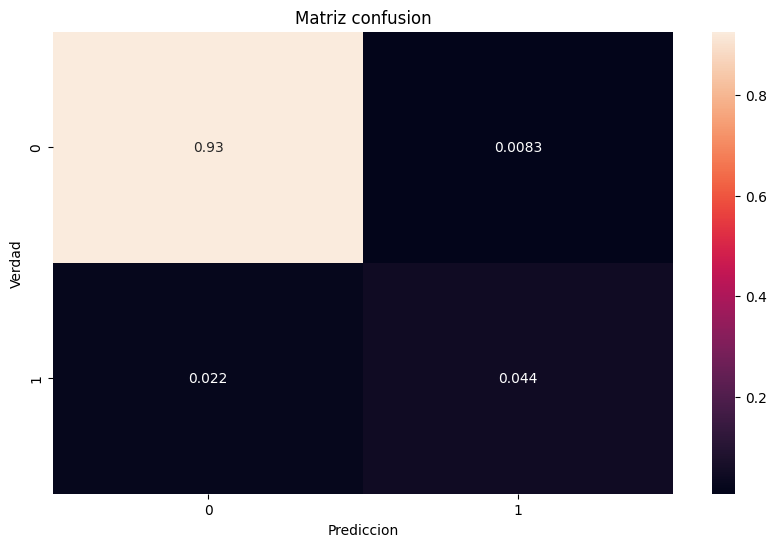

In [35]:
plt.figure(figsize=(10, 6))

ax=sns.heatmap(cm(y_test, y_pred)/sum(sum(cm(y_test, y_pred))), annot=True)

plt.title('Matriz confusion')
plt.ylabel('Verdad')
plt.xlabel('Prediccion')
plt.show();

In [42]:
X2=X.join(signals.Timestamp)

X2['anyo'] =X2["Timestamp"].dt.year
X2['Month'] =X2["Timestamp"].dt.month
X2['Day'] =X2["Timestamp"].dt.day
X2['Hour'] =X2["Timestamp"].dt.hour
X2['Minute'] =X2["Timestamp"].dt.minute

X2

Turbine_ID  Gen_RPM_Max  Gen_RPM_Min  Gen_RPM_Avg  Gen_RPM_Std  \
0               11       1339.4       1233.3       1270.9         18.8   
1                6       1270.0       1232.8       1248.5          6.8   
2                9       1376.7       1234.3       1272.0         24.7   
3                7       1317.5       1229.5       1254.9         13.8   
4                9       1485.0       1239.7       1321.4         50.4   
...            ...          ...          ...          ...          ...   
334457          11       1320.5       1216.8       1262.0         20.6   
334458           7       1329.9       1193.0       1257.6         18.9   
334459           1       1273.1       1239.8       1250.7          4.7   
334460           9       1258.3       1239.7       1249.5          3.1   
334461           6       1270.8       1229.6       1249.4          6.6   

        Gen_Bear_Temp_Avg  Gen_Phase1_Temp_Avg  Hyd_Oil_Temp_Avg  \
0                    42.0                   59                30   
1                    42.0                   51                30   
2                    40.0                   58                44   
3                    41.0                   62                32   
4                    40.0                   58                44   
...                   ...                  ...               ...   
334457               42.0                   56                28   
334458               38.0                   61                30   
334459               39.0                   59                26   
334460               39.0                   60                45   
334461               42.0                   56                28   

        Gear_Oil_Temp_Avg  Gear_Bear_Temp_Avg  ...  Grd_Prod_ReactPwr_Std  \
0                      48                  55  ...                    5.0   
1                      43                  48  ...                   16.5   
2                      43                  48  ...                    5.0   
3                      45                  49  ...                   24.7   
4                      43                  48  ...                    5.7   
...                   ...                 ...  ...                    ...   
334457                 50                  56  ...                    4.1   
334458                 49                  52  ...                    4.1   
334459                 49                  53  ...                    4.1   
334460                 46                  50  ...                    4.1   
334461                 49                  53  ...                    4.1   

        Grd_Prod_PsbleInd_Avg  Grd_Prod_PsbleInd_Max  Grd_Prod_PsbleInd_Min  \
0                      -973.4                 -752.6                -1000.0   
1                      -307.1                    0.0                 -880.6   
2                      -861.6                 -224.5                -1000.0   
3                      -536.5                    0.0                -1000.0   
4                      -871.4                 -293.3                -1000.0   
...                       ...                    ...                    ...   
334457                -1000.0                -1000.0                -1000.0   
334458                 -966.0                 -256.3                -1000.0   
334459                 -983.9                 -727.0                -1000.0   
334460                 -955.8                 -372.9                -1000.0   
334461                 -793.6                  -99.8                -1000.0   

        Grd_Prod_PsbleInd_Std  Grd_Prod_PsbleCap_Avg  Grd_Prod_PsbleCap_Max  \
0                        56.5                  973.4                 1000.0   
1                       180.0                  307.1                  880.6   
2                       185.5                  861.6                 1000.0   
3                       338.9                  536.5                 1000.0   
4                       227.4    

In [48]:
len(X2.loc[(X2.anyo==2017) & (X2.Month>9)])

45089